## Pengantar Image Data dengan Python
menggunakan Matplotlib dan OpenCV!

In [2]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

## Membaca Gambar

In [3]:
# mencari semua file yang berekstensi jpg
dog_files = glob('../input/cat-and-dog/training_set/training_set/dogs/*.jpg')
cat_files = glob('../input/cat-and-dog/training_set/training_set/cats/*.jpg')

In [7]:
/ data kita berbentuk 3D array 
img_mpl = plt.imread(cat_files[10])
img_cv2 = cv2.imread(cat_files[10])
img_mpl.shape, img_cv2.shape

((375, 499, 3), (375, 499, 3))

## Image Array
(Tinggi, Lebar, Channels)
- Image array adalah representasi digital dari sebuah gambar dalam bentuk array multidimensi. Setiap elemen dalam array tersebut merepresentasikan nilai piksel (pixel) dari gambar tersebut. Setiap piksel pada gambar memiliki atribut-atribut seperti intensitas warna, kecerahan, dan warna.
- Untuk array 3 dimensi biasanya kombinasi dari RGB(red, green, blue)

In [12]:
# 0 mewakili hitam dan 255 mewakili putih
img_mpl.max()

255

<Axes: title={'center': 'Distribusi Nilai Pixel'}, ylabel='Frequency'>

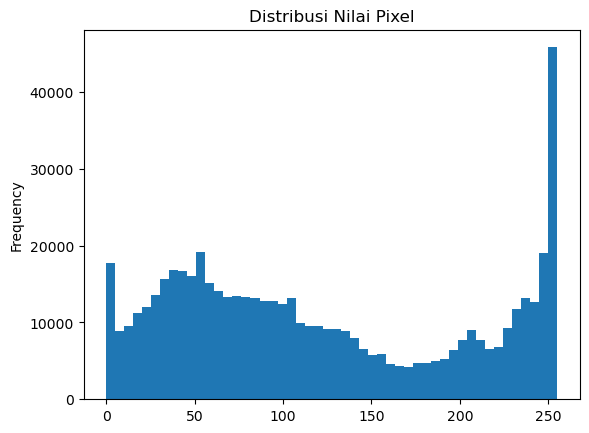

In [18]:
# mengubah dari multidimensi array menjadi 1 dimensi array
pd.Series(img_mpl.flatten()).plot(kind='hist', bins=50, title='Distribusi Nilai Pixel')

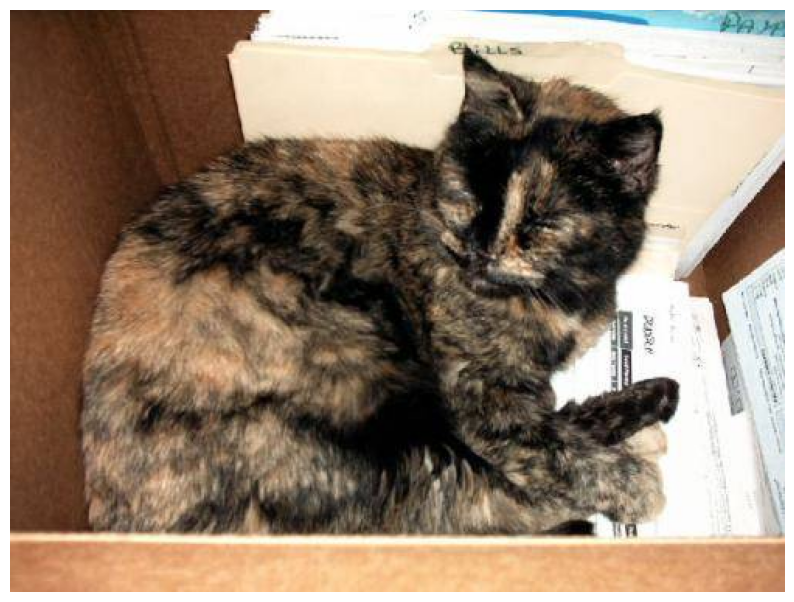

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

## Kanal Gambar
Representasi gambar yang paling umum adalah model warna RGB (Merah, Hijau, Biru), yang menggunakan tiga kanal. Dalam model ini, setiap piksel direpresentasikan oleh tiga nilai yang menentukan intensitas cahaya merah, hijau, dan biru. Dengan menggabungkan intensitas yang berbeda dari ketiga warna primer ini, berbagai macam warna dapat diciptakan.

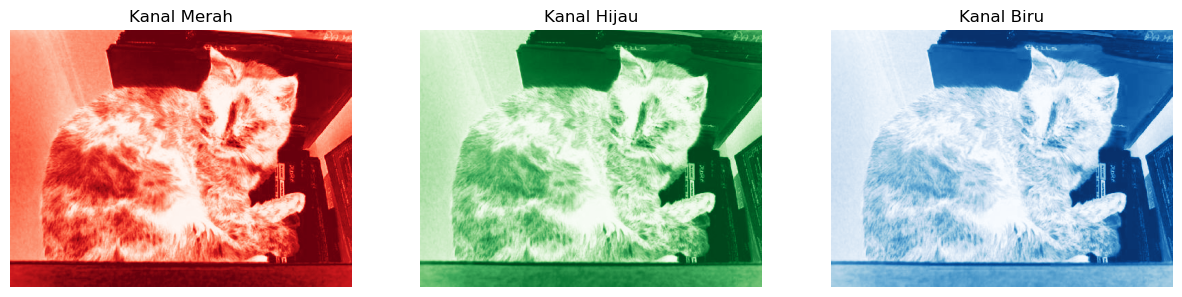

In [37]:
# Menampilkan Kanal RGB gambar kita
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Kanal Merah')
axs[1].set_title('Kanal Hijau')
axs[2].set_title('Kanal Biru')
plt.show()

## Matplotlib vs CV2 Numpy Array
- CV2 membaca kanal dengan order BGR(biru, hijau, merah)
- Matplotlib membaca kandal dengan order RGB(merah, hijau, biru)

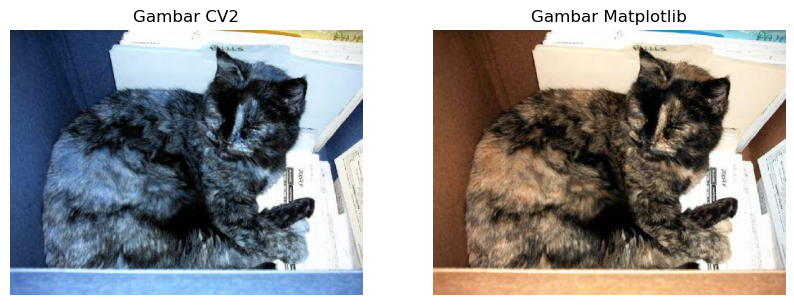

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('Gambar CV2')
axs[1].set_title('Gambar Matplotlib')
plt.show()

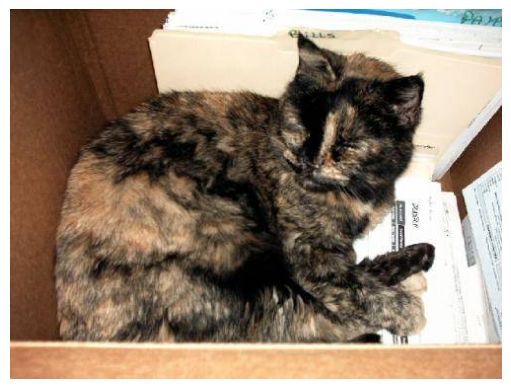

In [46]:
## Mengkonfersi dari BGR ke RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

## Manipulasi Gambar

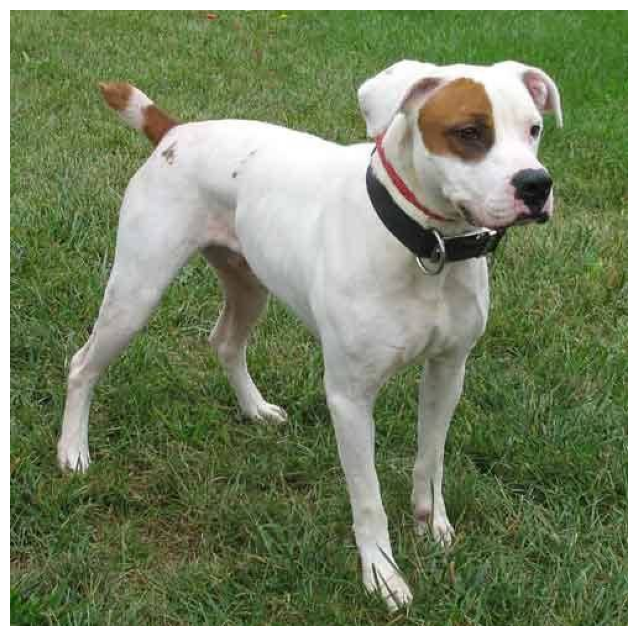

In [51]:
dog_img = plt.imread(dog_files[4])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(dog_img)
ax.axis('off')
plt.show()

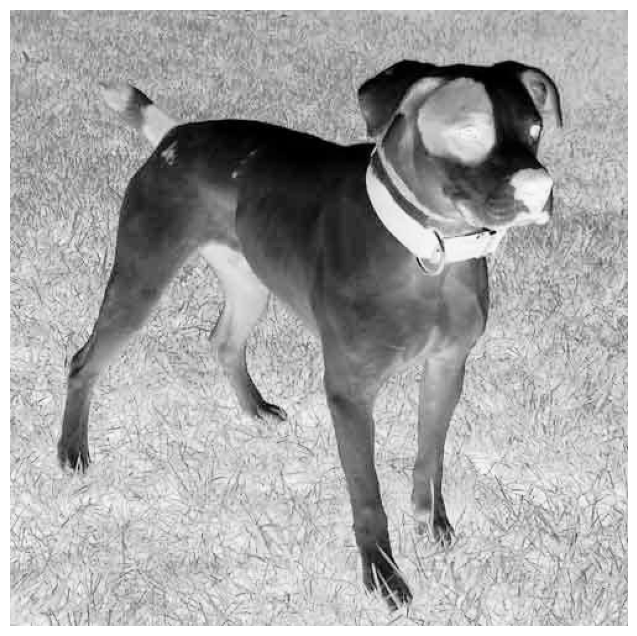

In [61]:
dog_img_gray = cv2.cvtColor(dog_img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(dog_img_gray, cmap='Greys')
ax.axis('off')
plt.show()

In [58]:
dog_img_grey.shape
# terdiri dari 2 dimensi and 1 kanal, yaitu kanal grayscale

(499, 500)

## Resizing and Rescalling

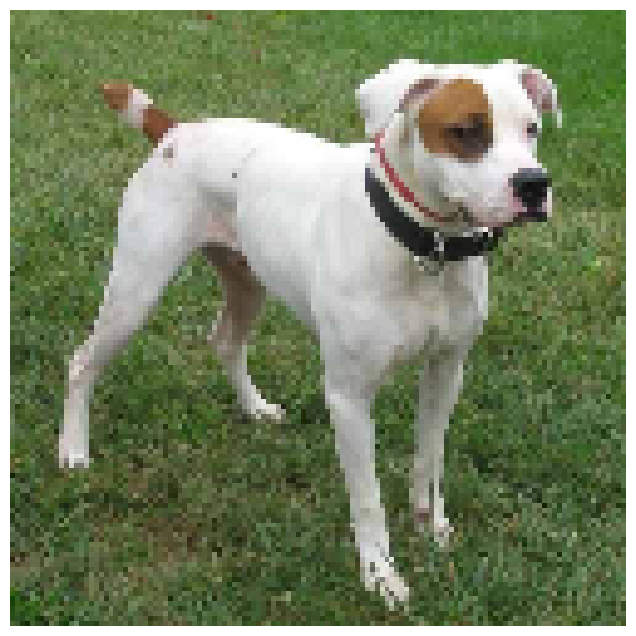

In [64]:
# membuat gambar menjadi pixelated 
dog_resized = cv2.resize(dog_img, None, fx=.25, fy=.25)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(dog_resized)
ax.axis('off')
plt.show()

In [73]:
print('original: ',dog_img.shape)
print('reshape: ',dog_resized.shape)

original:  (499, 500, 3)
reshape:  (125, 125, 3)


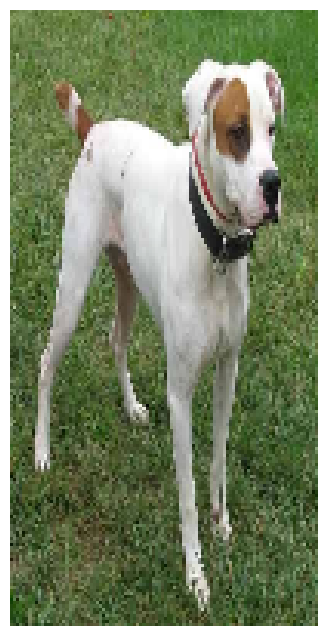

In [74]:
# Ukuran yang berbeda
# tinggi = 100 unit dan lebar 200  
img_resize = cv2.resize(dog_img, (100, 200))
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

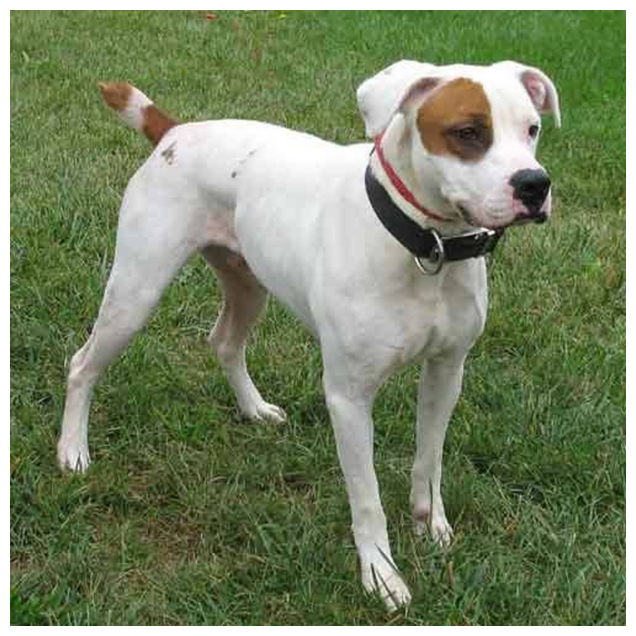

In [75]:
img_resize = cv2.resize(dog_img, (5000, 5000), interpolation=cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()
# INTER_CUBIC = Metode ini memberikan hasil yang lebih berkualitas dibandingkan dengan beberapa metode interpolasi lainnya,
#seperti cv2.INTER_LINEAR (interpolasi bilinear), tetapi metode ini lebih lambat.

In [76]:
img_resize.shape

(5000, 5000, 3)

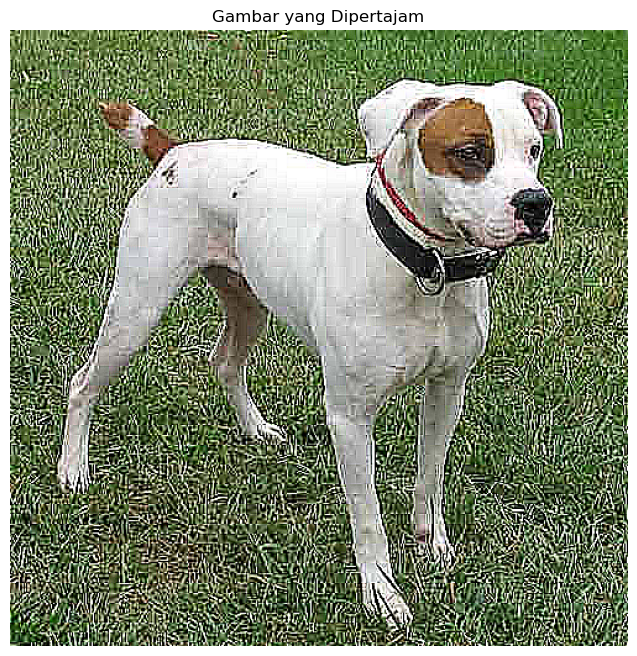

In [86]:
# Mempertajam Gambar
kernel_sharpening = np.array([[-1,-1,-1],
                             [-1,9,-1],
                             [-1,-1,-1]])

sharpened = cv2.filter2D(dog_img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Gambar yang Dipertajam')
plt.show()

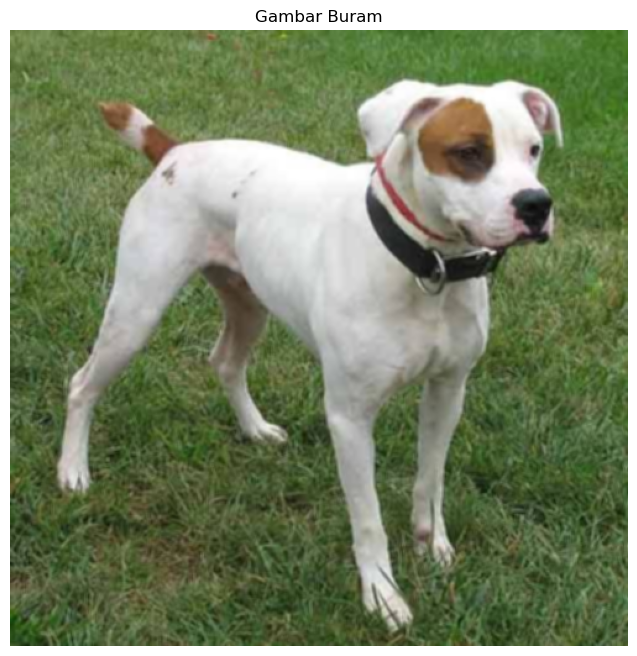

In [96]:
# Membuat Gambar Blurr
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(dog_img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8,8))
ax.axis('off')
ax.imshow(blurred)
ax.set_title('Gambar Buram')
plt.show()

In [98]:
# Save image
plt.imsave('mpl_dog.png', blurred)
cv2.imwrite('cv2_dog.png', blurred)

True